<a href="https://colab.research.google.com/github/ecostadelle/ProjetoPesquisaTratamentoIncertezas/blob/main/src/Tratamento_Incertezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

github = 'https://raw.githubusercontent.com/ecostadelle/RandomForestTex/main/db/transforma.csv'

df = pd.read_csv(github, sep = ';',decimal=",")
X = df[['ira_nb1', 'ira_mr1', 'ira_nb3', 'rec_s1']]
y = y=df[['resultado_final']]

print(df)

       ano  periodo estudante  ira_nb1  ira_mr1  ira_nb3  rec_s1  rec_s2  \
0     2013        2  1E3F43B5    66.40    71.67    71.27     3.0     0.0   
1     2013        3  834ACD28    68.83    71.92    72.31     0.0     0.0   
2     2013        3  E7AAEDC6    65.42    64.25    65.19     3.0     1.0   
3     2013        3  64E8060D    70.42    71.25    72.00     2.0     0.0   
4     2013        3  0F8AAB02    65.33    69.92    70.67     2.0     0.0   
...    ...      ...       ...      ...      ...      ...     ...     ...   
1139  2020        1  0AE66D11    52.50    62.50    66.08     7.0     8.0   
1140  2020        1  79616288    46.88    48.50    49.96    10.0    11.0   
1141  2020        1  04583447    29.19    32.19    25.38    15.0    15.0   
1142  2020        1  ACE171F2    33.19    39.00    42.56    16.0     9.0   
1143  2020        1  FE4DF1AA    82.94    79.44    81.54     1.0     3.0   

      qtd_disciplinas    ap   ac    rt   rf resultado_final  \
0                  15  1

In [ ]:
faixas=labels=['1D','1C','1B','1A']
df['ira_nb1_d'] = pd.cut(x=df['ira_nb1'],bins=[0,25,50,75,100],labels=faixas)
faixas=labels=['2D','2C','2B','2A']
df['ira_mr1_d'] = pd.cut(x=df['ira_mr1'],bins=[0,25,50,75,100],labels=faixas)
faixas=labels=['3D','3C','3B','3A']
df['ira_nb3_d'] = pd.cut(x=df['ira_nb3'],bins=[0,25,50,75,100],labels=faixas)

In [ ]:
df

,ano,periodo,estudante,ira_nb1,ira_mr1,ira_nb3,rec_s1,rec_s2,qtd_disciplinas,ap,ac,rt,rf,resultado_final,situacao_atual,grupo,ira_nb1_d,ira_mr1_d,ira_nb3_d
0,2013,2,1E3F43B5,66.40,71.67,71.27,3.0,0.0,15,15.0,0.0,0.0,0.0,Aprovado,Concluído,1.0,1B,2B,3B
1,2013,3,834ACD28,68.83,71.92,72.31,0.0,0.0,12,12.0,0.0,0.0,0.0,Aprovado,Concluído,2.0,1B,2B,3B
2,2013,3,E7AAEDC6,65.42,64.25,65.19,3.0,1.0,12,11.0,0.0,1.0,0.0,Aprovado,Transferido Externo,0.0,1B,2B,3B
3,2013,3,64E8060D,70.42,71.25,72.00,2.0,0.0,12,12.0,0.0,0.0,0.0,Aprovado,Concluído,1.0,1B,2B,3B
4,2013,3,0F8AAB02,65.33,69.92,70.67,2.0,0.0,12,12.0,0.0,0.0,0.0,Aprovado,Concluído,1.0,1B,2B,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2020,1,0AE66D11,52.50,62.50,66.08,7.0,8.0,16,16.0,0.0,0.0,0.0,Aprovado,Matriculado,1.0,1B,2B,3B
1140,2020,1,79616288,46.88,48.50,49.96,10.0,11.0,16,4.0,0.0,12.0,0.0,Reprovado,Transferido Externo,-1.0,1C,2C,3C
1141,2020,1,04583447,29.19,32.19,25.38,15.0,15.0,16,0.0,0.0,16.0,0.0,Reprovado,Transferido Externo,-1.0,1C,2C,3C
1142,2020,1,ACE171F2,33.19,39.00,42.56,16.0,9.0,16,3.0,0.0,13.0,0.0,Reprovado,Transferido Externo,-1.0,1C,2C,3C


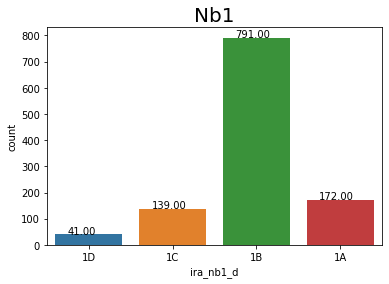

In [ ]:
import matplotlib as plt
import seaborn as sns
ax=sns.countplot(x ='ira_nb1_d', data = df)
ax.set_title('Nb1', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

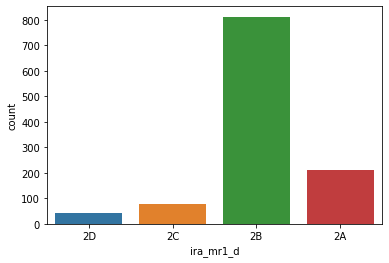

In [ ]:
sns.countplot(x ='ira_mr1_d', data = df)

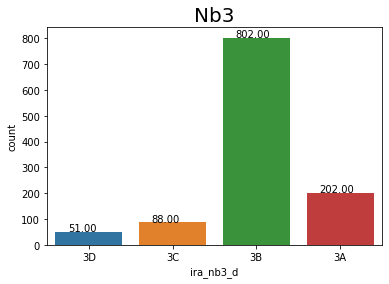

In [ ]:
ax = sns.countplot(x ='ira_nb3_d', data = df)
ax.set_title('Nb3', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

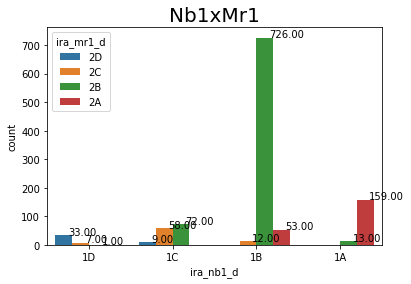

In [ ]:
ax=sns.countplot(x ='ira_nb1_d', hue = "ira_mr1_d", data = df)
ax.set_title('Nb1xMr1', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

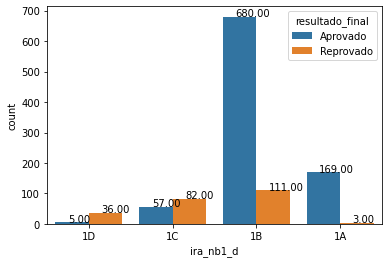

In [ ]:
ax=sns.countplot(x ='ira_nb1_d', hue = "resultado_final", data = df)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [ ]:
import plotly.graph_objects as go
df1 = df.groupby(['ira_nb1_d', 'ira_mr1_d'])['estudante'].count().reset_index()
df1.columns = ['source', 'target', 'value']
df2 = df.groupby(['ira_mr1_d', 'ira_nb3_d'])['estudante'].count().reset_index()
df2.columns = ['source', 'target', 'value']
df3 = df.groupby(['ira_nb3_d', 'resultado_final'])['estudante'].count().reset_index()
df3.columns = ['source', 'target', 'value']
links = pd.concat([df1, df2,df3], axis=0)
links

,source,target,value
0,1D,2D,33
1,1D,2C,7
2,1D,2B,1
3,1D,2A,0
4,1C,2D,9
5,1C,2C,58
6,1C,2B,72
7,1C,2A,0
8,1B,2D,0
9,1B,2C,12


In [ ]:
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))

In [ ]:
unique_source_target

['1D',
 '1C',
 '1B',
 '1A',
 '2D',
 '2C',
 '2B',
 '2A',
 '3D',
 '3C',
 '3B',
 '3A',
 'Aprovado',
 'Reprovado']

In [ ]:
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

In [ ]:
mapping_dict

{'1A': 3,
 '1B': 2,
 '1C': 1,
 '1D': 0,
 '2A': 7,
 '2B': 6,
 '2C': 5,
 '2D': 4,
 '3A': 11,
 '3B': 10,
 '3C': 9,
 '3D': 8,
 'Aprovado': 12,
 'Reprovado': 13}

In [ ]:
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

In [ ]:
links_dict = links.to_dict(orient='list')

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_source_target,
      color = "blue"
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"]
  ))])

In [ ]:
fig.update_layout(title_text="Grade Sankey Diagram", font_size=10)
fig.show()

In [ ]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of students')

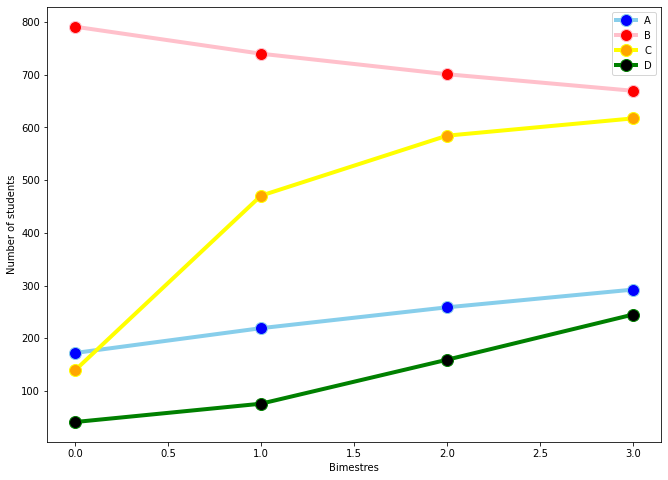

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a_val,b_val,c_val,d_val = [],[],[],[]
# initial state
init_state = np.array([172, 791, 139, 41])
# transition matrix
a = np.array([[ 0.924, 0.076 ,0 , 0], [ 0.067, 0.918, 0.015, 0], [ 0, 0.518 ,0.417, 0.065], [0, 0.024, 0.171, 0.805]])
for x in range(4):
    a_val.append(init_state[0])
    b_val.append(init_state[1])
    c_val.append(init_state[2])
    d_val.append(init_state[3])
    b = init_state
    init_state = a.dot(b)
# plotting
plt.figure(figsize=(11,8))
plt.plot( [x for x in range(4)], a_val, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='A')
plt.plot( [x for x in range(4)], b_val, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4,label='B')
plt.plot( [x for x in range(4)], c_val, marker='o', markerfacecolor='orange', markersize=12, color='yellow', linewidth=4,label='C')
plt.plot( [x for x in range(4)], d_val, marker='o', markerfacecolor='black', markersize=12, color='green', linewidth=4,label='D')
plt.legend(loc='best')
plt.xlabel('Bimestres')
plt.ylabel('Number of students')

Text(0, 0.5, 'Number of students')

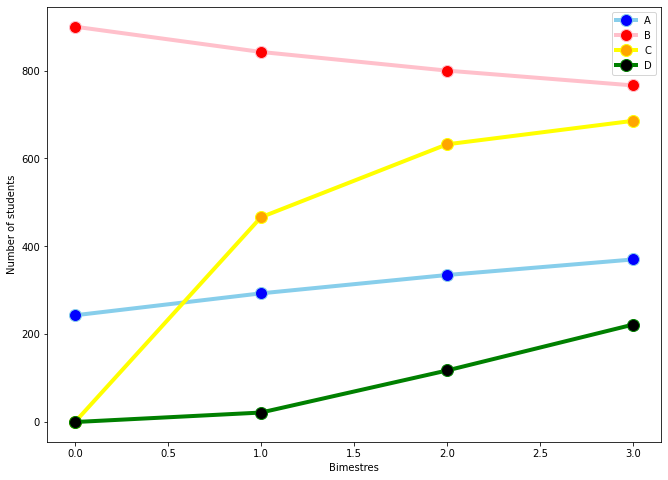

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a_val,b_val,c_val,d_val = [],[],[],[]
# initial state
init_state = np.array([243, 900, 0, 0])
# transition matrix
a = np.array([[ 0.924, 0.076 ,0 , 0], [ 0.067, 0.918, 0.015, 0], [ 0, 0.518 ,0.417, 0.065], [0, 0.024, 0.171, 0.805]])
for x in range(4):
    a_val.append(init_state[0])
    b_val.append(init_state[1])
    c_val.append(init_state[2])
    d_val.append(init_state[3])
    b = init_state
    init_state = a.dot(b)
# plotting
plt.figure(figsize=(11,8))
plt.plot( [x for x in range(4)], a_val, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='A')
plt.plot( [x for x in range(4)], b_val, marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4,label='B')
plt.plot( [x for x in range(4)], c_val, marker='o', markerfacecolor='orange', markersize=12, color='yellow', linewidth=4,label='C')
plt.plot( [x for x in range(4)], d_val, marker='o', markerfacecolor='black', markersize=12, color='green', linewidth=4,label='D')
plt.legend(loc='best')
plt.xlabel('Bimestres')
plt.ylabel('Number of students')

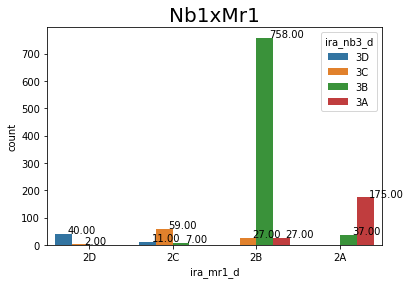

In [ ]:
ax=sns.countplot(x ='ira_mr1_d', hue = "ira_nb3_d", data = df)
ax.set_title('Nb1xMr1', fontsize=20)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))